In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_excel('Datasets/Flight/Data_Train.xlsx')

In [43]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [45]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
Airline=list(df["Airline"].unique())

In [48]:
airline_dict={'IndiGo':0,
 'Air India':1,
 'Jet Airways':2,
 'SpiceJet':3,
 'Multiple carriers':4,
 'GoAir':5,
 'Vistara':6,
 'Air Asia':7,
 'Vistara Premium economy':7,
 'Jet Airways Business':8,
 'Multiple carriers Premium economy':9,
 'Trujet':10}

In [49]:
df=df.drop("Route",1)

In [50]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])
df=df.drop("Additional_Info",1)
df["Journey_day"]=df["Date_of_Journey"].dt.day
df["Journey_month"]=df["Date_of_Journey"].dt.month
df.drop("Date_of_Journey",axis=1,inplace=True)

In [51]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,2021-04-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,2021-04-11 05:50:00,2021-04-11 13:15:00,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,2021-04-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,2021-04-11 18:05:00,2021-04-11 23:30:00,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,2021-04-11 16:50:00,2021-04-11 21:35:00,4h 45m,1 stop,13302,3,1


In [52]:
df["Arrival_Hour"]=df["Arrival_Time"].dt.hour
df["Arrival_Minute"]=df["Arrival_Time"].dt.minute
df["Dep_Hour"]=df["Dep_Time"].dt.hour
df["Dep_Minute"]=df["Dep_Time"].dt.minute

In [53]:
df.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [54]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50


In [55]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

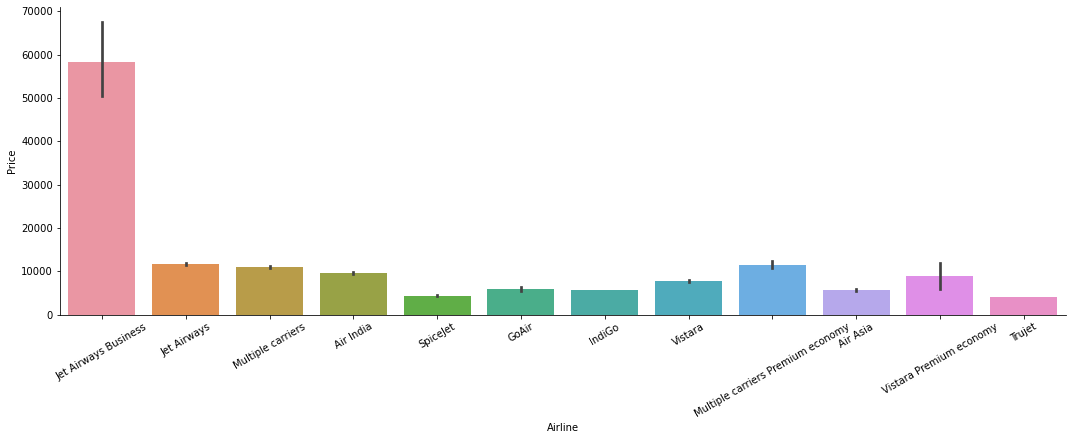

In [56]:
g=sns.catplot(x="Airline",
            y="Price",
            data=df.sort_values(by="Price",ascending=False),
           kind="bar",
           aspect = 3,
           )
g.set_xticklabels(rotation=30);

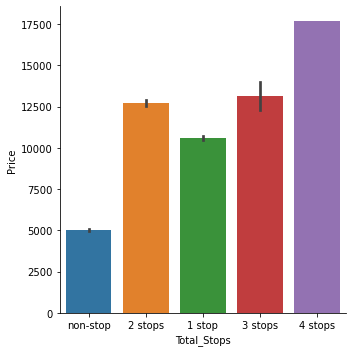

In [57]:
c=sns.catplot(x="Total_Stops",
              y="Price",
              data=df,
              aspect=1,
              kind="bar")

In [58]:
df['Total_Stops'].replace({'non-stop' : 0,
               '1 stop' : 1,
               '2 stops' : 2,
               '3 stops' : 3,
               '4 stops' : 4
              }, inplace = True)

In [59]:
df["Airline"].replace({'IndiGo':0,
 'Air India':1,
 'Jet Airways':2,
 'SpiceJet':3,
 'Multiple carriers':4,
 'GoAir':5,
 'Vistara':6,
 'Air Asia':7,
 'Vistara Premium economy':7,
 'Jet Airways Business':8,
 'Multiple carriers Premium economy':9,
 'Trujet':10},inplace=True)

In [60]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,0,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20
1,1,Kolkata,Banglore,7h 25m,2,7662,5,1,13,15,5,50
2,2,Delhi,Cochin,19h,2,13882,6,9,4,25,9,25
3,0,Kolkata,Banglore,5h 25m,1,6218,5,12,23,30,18,5
4,0,Banglore,New Delhi,4h 45m,1,13302,3,1,21,35,16,50


In [61]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [66]:
df['Source'].replace({"Delhi":0,
                      "Kolkata":1,
                      "Banglore":2,
                      "Mumbai":3,
              
                      "Chennai":4},inplace=True)

In [63]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [64]:
df['Destination'].replace({"Delhi":0,
                      "Kolkata":1,
                      "Banglore":2,
                      "Cochin":3,
                      "Hyderabad":4,
                     "New Delhi":5,
                        },inplace=True)

In [69]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,0,2,5,2h 50m,0,3897,24,3,1,10,22,20
1,1,1,2,7h 25m,2,7662,5,1,13,15,5,50
2,2,0,3,19h,2,13882,6,9,4,25,9,25
3,0,1,2,5h 25m,1,6218,5,12,23,30,18,5
4,0,2,5,4h 45m,1,13302,3,1,21,35,16,50


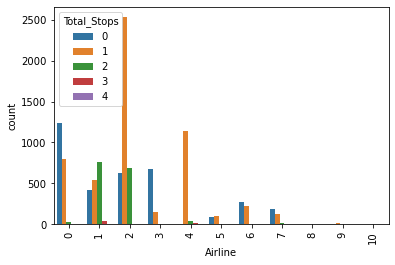

In [70]:
g=sns.countplot(x='Airline',hue='Total_Stops',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90);

In [71]:
duration = list(df['Duration'])

#for i in range(len(duration)):
#    print(duration[i].split())

for i in range(len(duration)):
    if (len(duration[i].split()) != 2):
        if 'h' in duration[i]:
             duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]

In [72]:
df['Duration'] = duration

In [73]:
df['Duration_min'] = [i.split("h")[1].split('m')[0].strip() for i in df["Duration"]]

In [75]:
df['Duration_hour'] = [i.split("h")[0] for i in df["Duration"]]

In [76]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_min,Duration_hour
0,0,2,5,2h 50m,0,3897,24,3,1,10,22,20,50,2
1,1,1,2,7h 25m,2,7662,5,1,13,15,5,50,25,7
2,2,0,3,19h 0m,2,13882,6,9,4,25,9,25,0,19
3,0,1,2,5h 25m,1,6218,5,12,23,30,18,5,25,5
4,0,2,5,4h 45m,1,13302,3,1,21,35,16,50,45,4


In [78]:
df.drop(["Duration"],axis=1,inplace=True)

In [79]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_min,Duration_hour
0,0,2,5,0,3897,24,3,1,10,22,20,50,2
1,1,1,2,2,7662,5,1,13,15,5,50,25,7
2,2,0,3,2,13882,6,9,4,25,9,25,0,19
3,0,1,2,1,6218,5,12,23,30,18,5,25,5
4,0,2,5,1,13302,3,1,21,35,16,50,45,4


In [81]:
df["Duration_Hour"]=df['Duration_hour'].astype(str).astype(int)
df["Duration_min"]=df["Duration_min"].astype(str).astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  int64 
 1   Source          10682 non-null  int64 
 2   Destination     10682 non-null  int64 
 3   Total_Stops     10682 non-null  int64 
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int64 
 6   Journey_month   10682 non-null  int64 
 7   Arrival_Hour    10682 non-null  int64 
 8   Arrival_Minute  10682 non-null  int64 
 9   Dep_Hour        10682 non-null  int64 
 10  Dep_Minute      10682 non-null  int64 
 11  Duration_min    10682 non-null  int32 
 12  Duration_hour   10682 non-null  object
 13  Duration_Hour   10682 non-null  int32 
dtypes: int32(2), int64(11), object(1)
memory usage: 1.5+ MB


In [83]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_min,Duration_hour,Duration_Hour
0,0,2,5,0,3897,24,3,1,10,22,20,50,2,2
1,1,1,2,2,7662,5,1,13,15,5,50,25,7,7
2,2,0,3,2,13882,6,9,4,25,9,25,0,19,19
3,0,1,2,1,6218,5,12,23,30,18,5,25,5,5
4,0,2,5,1,13302,3,1,21,35,16,50,45,4,4


In [84]:
df.drop(["Duration_hour"],axis=1,inplace=True)

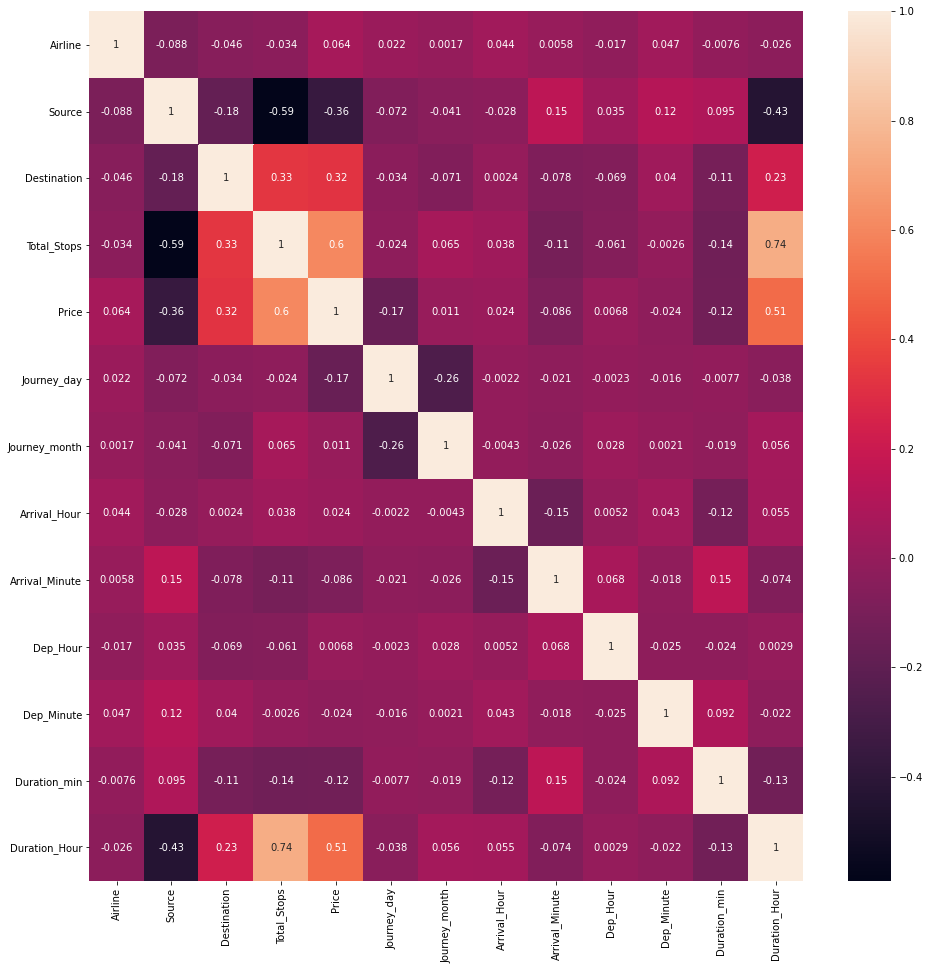

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True);

In [88]:
X=df.drop(["Price"],axis=1)
y=df["Price"].values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
print('Train:',(X_train.shape, y_train.shape))
print('Test:',(X_test.shape, y_test.shape))

Train: ((7477, 12), (7477,))
Test: ((3205, 12), (3205,))


In [92]:
from catboost import CatBoostRegressor
catboost= CatBoostRegressor()
catboost.fit(X,y)

Learning rate set to 0.059498
0:	learn: 4445.3881858	total: 171ms	remaining: 2m 51s
1:	learn: 4292.2159395	total: 189ms	remaining: 1m 34s
2:	learn: 4141.6017068	total: 207ms	remaining: 1m 8s
3:	learn: 4013.5250025	total: 224ms	remaining: 55.8s
4:	learn: 3882.8318864	total: 244ms	remaining: 48.6s
5:	learn: 3763.5294821	total: 252ms	remaining: 41.8s
6:	learn: 3655.1896052	total: 261ms	remaining: 37s
7:	learn: 3555.6654787	total: 272ms	remaining: 33.7s
8:	learn: 3476.2066676	total: 280ms	remaining: 30.8s
9:	learn: 3388.7842873	total: 287ms	remaining: 28.4s
10:	learn: 3307.5646122	total: 294ms	remaining: 26.4s
11:	learn: 3242.4225178	total: 300ms	remaining: 24.7s
12:	learn: 3181.7511774	total: 306ms	remaining: 23.2s
13:	learn: 3120.1512935	total: 312ms	remaining: 22s
14:	learn: 3061.1470418	total: 317ms	remaining: 20.8s
15:	learn: 3009.6539582	total: 321ms	remaining: 19.8s
16:	learn: 2961.3943687	total: 327ms	remaining: 18.9s
17:	learn: 2922.6996619	total: 332ms	remaining: 18.1s
18:	learn:

168:	learn: 1956.8090938	total: 833ms	remaining: 4.09s
169:	learn: 1954.9164371	total: 836ms	remaining: 4.08s
170:	learn: 1952.7517274	total: 839ms	remaining: 4.07s
171:	learn: 1950.9609051	total: 843ms	remaining: 4.06s
172:	learn: 1949.7590066	total: 846ms	remaining: 4.04s
173:	learn: 1946.8139632	total: 850ms	remaining: 4.03s
174:	learn: 1945.9528356	total: 854ms	remaining: 4.02s
175:	learn: 1943.9087874	total: 858ms	remaining: 4.02s
176:	learn: 1941.6212735	total: 861ms	remaining: 4s
177:	learn: 1939.1999102	total: 865ms	remaining: 3.99s
178:	learn: 1937.5673129	total: 869ms	remaining: 3.98s
179:	learn: 1935.2873376	total: 873ms	remaining: 3.98s
180:	learn: 1933.1498491	total: 876ms	remaining: 3.96s
181:	learn: 1930.9100806	total: 880ms	remaining: 3.95s
182:	learn: 1929.1931214	total: 893ms	remaining: 3.99s
183:	learn: 1926.9222449	total: 898ms	remaining: 3.98s
184:	learn: 1925.0177935	total: 901ms	remaining: 3.97s
185:	learn: 1923.6508050	total: 909ms	remaining: 3.98s
186:	learn: 1

341:	learn: 1726.0303390	total: 1.51s	remaining: 2.9s
342:	learn: 1725.0661934	total: 1.51s	remaining: 2.89s
343:	learn: 1724.2265153	total: 1.51s	remaining: 2.88s
344:	learn: 1722.4680409	total: 1.52s	remaining: 2.88s
345:	learn: 1721.6157354	total: 1.52s	remaining: 2.87s
346:	learn: 1720.8470991	total: 1.52s	remaining: 2.87s
347:	learn: 1719.7876172	total: 1.53s	remaining: 2.86s
348:	learn: 1718.1808852	total: 1.53s	remaining: 2.85s
349:	learn: 1717.1261655	total: 1.53s	remaining: 2.85s
350:	learn: 1716.3870161	total: 1.54s	remaining: 2.84s
351:	learn: 1714.8227949	total: 1.54s	remaining: 2.84s
352:	learn: 1714.2300128	total: 1.54s	remaining: 2.83s
353:	learn: 1713.7017799	total: 1.55s	remaining: 2.83s
354:	learn: 1713.3169935	total: 1.55s	remaining: 2.82s
355:	learn: 1712.1476909	total: 1.55s	remaining: 2.81s
356:	learn: 1710.8286312	total: 1.56s	remaining: 2.81s
357:	learn: 1709.9939969	total: 1.56s	remaining: 2.8s
358:	learn: 1709.6799995	total: 1.57s	remaining: 2.8s
359:	learn: 1

536:	learn: 1584.8139402	total: 2.18s	remaining: 1.88s
537:	learn: 1584.5018309	total: 2.18s	remaining: 1.87s
538:	learn: 1583.8177933	total: 2.18s	remaining: 1.87s
539:	learn: 1583.3007415	total: 2.19s	remaining: 1.86s
540:	learn: 1582.9730897	total: 2.19s	remaining: 1.86s
541:	learn: 1582.5758740	total: 2.19s	remaining: 1.85s
542:	learn: 1581.5849330	total: 2.2s	remaining: 1.85s
543:	learn: 1581.1087991	total: 2.2s	remaining: 1.84s
544:	learn: 1580.4720355	total: 2.21s	remaining: 1.84s
545:	learn: 1580.3590086	total: 2.21s	remaining: 1.84s
546:	learn: 1580.0733420	total: 2.21s	remaining: 1.83s
547:	learn: 1579.5047689	total: 2.22s	remaining: 1.83s
548:	learn: 1578.6511759	total: 2.22s	remaining: 1.82s
549:	learn: 1578.3016367	total: 2.22s	remaining: 1.82s
550:	learn: 1577.9998185	total: 2.23s	remaining: 1.81s
551:	learn: 1577.4671370	total: 2.23s	remaining: 1.81s
552:	learn: 1576.9242217	total: 2.23s	remaining: 1.8s
553:	learn: 1575.7587558	total: 2.23s	remaining: 1.8s
554:	learn: 15

693:	learn: 1510.9796165	total: 2.68s	remaining: 1.18s
694:	learn: 1510.5835295	total: 2.68s	remaining: 1.18s
695:	learn: 1510.2647494	total: 2.69s	remaining: 1.17s
696:	learn: 1509.9091732	total: 2.69s	remaining: 1.17s
697:	learn: 1509.7443459	total: 2.69s	remaining: 1.17s
698:	learn: 1509.3371699	total: 2.7s	remaining: 1.16s
699:	learn: 1509.0261345	total: 2.7s	remaining: 1.16s
700:	learn: 1508.4502510	total: 2.71s	remaining: 1.15s
701:	learn: 1507.9672050	total: 2.71s	remaining: 1.15s
702:	learn: 1507.4891838	total: 2.72s	remaining: 1.15s
703:	learn: 1506.5398834	total: 2.72s	remaining: 1.14s
704:	learn: 1505.5682152	total: 2.73s	remaining: 1.14s
705:	learn: 1504.8972651	total: 2.73s	remaining: 1.14s
706:	learn: 1504.4259046	total: 2.73s	remaining: 1.13s
707:	learn: 1503.8005453	total: 2.74s	remaining: 1.13s
708:	learn: 1503.2912657	total: 2.74s	remaining: 1.13s
709:	learn: 1502.8146696	total: 2.75s	remaining: 1.12s
710:	learn: 1502.4535689	total: 2.75s	remaining: 1.12s
711:	learn: 

847:	learn: 1448.4701274	total: 3.35s	remaining: 600ms
848:	learn: 1448.1010742	total: 3.35s	remaining: 597ms
849:	learn: 1448.0936683	total: 3.36s	remaining: 593ms
850:	learn: 1447.9384656	total: 3.36s	remaining: 589ms
851:	learn: 1447.7075391	total: 3.37s	remaining: 585ms
852:	learn: 1447.5201149	total: 3.37s	remaining: 581ms
853:	learn: 1447.2015821	total: 3.38s	remaining: 577ms
854:	learn: 1447.0428458	total: 3.38s	remaining: 573ms
855:	learn: 1446.2326048	total: 3.38s	remaining: 569ms
856:	learn: 1446.0502497	total: 3.39s	remaining: 566ms
857:	learn: 1445.3567789	total: 3.39s	remaining: 562ms
858:	learn: 1444.8480400	total: 3.4s	remaining: 558ms
859:	learn: 1444.6315455	total: 3.4s	remaining: 554ms
860:	learn: 1444.0119496	total: 3.41s	remaining: 550ms
861:	learn: 1443.6131243	total: 3.41s	remaining: 546ms
862:	learn: 1443.1890484	total: 3.41s	remaining: 542ms
863:	learn: 1442.8578501	total: 3.42s	remaining: 538ms
864:	learn: 1442.2346678	total: 3.42s	remaining: 534ms
865:	learn: 

998:	learn: 1399.3448242	total: 4.01s	remaining: 4.01ms
999:	learn: 1399.1076524	total: 4.01s	remaining: 0us


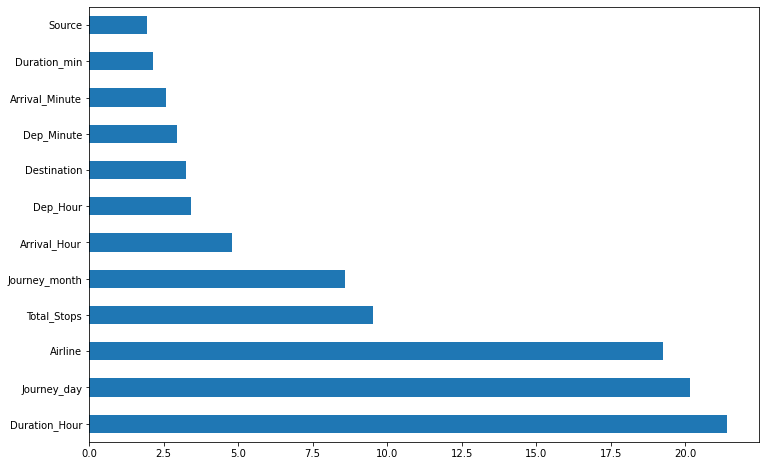

In [93]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(catboost.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [94]:
model= catboost.fit(X_train, y_train)

Learning rate set to 0.055837
0:	learn: 4522.0287762	total: 3.91ms	remaining: 3.91s
1:	learn: 4382.1723196	total: 8.25ms	remaining: 4.12s
2:	learn: 4237.0566209	total: 12.2ms	remaining: 4.05s
3:	learn: 4119.2790739	total: 15.5ms	remaining: 3.87s
4:	learn: 3997.1469543	total: 18.7ms	remaining: 3.72s
5:	learn: 3879.9601548	total: 22.1ms	remaining: 3.66s
6:	learn: 3771.9475319	total: 25.3ms	remaining: 3.6s
7:	learn: 3664.7996415	total: 29ms	remaining: 3.6s
8:	learn: 3578.4157333	total: 33.1ms	remaining: 3.64s
9:	learn: 3498.7781155	total: 36.6ms	remaining: 3.62s
10:	learn: 3419.1378953	total: 39.9ms	remaining: 3.59s
11:	learn: 3352.2267768	total: 43.6ms	remaining: 3.59s
12:	learn: 3285.3230249	total: 46.9ms	remaining: 3.56s
13:	learn: 3228.3996633	total: 50.3ms	remaining: 3.54s
14:	learn: 3172.6924997	total: 53.5ms	remaining: 3.51s
15:	learn: 3117.6655738	total: 56.9ms	remaining: 3.5s
16:	learn: 3066.2166271	total: 60.2ms	remaining: 3.48s
17:	learn: 3022.0550201	total: 65.5ms	remaining: 3

195:	learn: 1925.9963024	total: 484ms	remaining: 1.98s
196:	learn: 1924.6031318	total: 485ms	remaining: 1.98s
197:	learn: 1923.2119214	total: 487ms	remaining: 1.97s
198:	learn: 1921.7904243	total: 489ms	remaining: 1.97s
199:	learn: 1919.6391624	total: 491ms	remaining: 1.97s
200:	learn: 1918.8011550	total: 493ms	remaining: 1.96s
201:	learn: 1917.2547373	total: 496ms	remaining: 1.96s
202:	learn: 1915.9819542	total: 498ms	remaining: 1.96s
203:	learn: 1913.7772733	total: 500ms	remaining: 1.95s
204:	learn: 1910.3472048	total: 502ms	remaining: 1.95s
205:	learn: 1908.6814356	total: 504ms	remaining: 1.94s
206:	learn: 1906.5229294	total: 507ms	remaining: 1.94s
207:	learn: 1905.4416846	total: 510ms	remaining: 1.94s
208:	learn: 1903.5030036	total: 512ms	remaining: 1.94s
209:	learn: 1902.0706229	total: 514ms	remaining: 1.93s
210:	learn: 1900.4481497	total: 516ms	remaining: 1.93s
211:	learn: 1899.4618140	total: 518ms	remaining: 1.93s
212:	learn: 1897.6219328	total: 520ms	remaining: 1.92s
213:	learn

411:	learn: 1685.6399691	total: 960ms	remaining: 1.37s
412:	learn: 1684.8856113	total: 963ms	remaining: 1.37s
413:	learn: 1684.2442788	total: 965ms	remaining: 1.37s
414:	learn: 1683.7211477	total: 967ms	remaining: 1.36s
415:	learn: 1682.6464942	total: 970ms	remaining: 1.36s
416:	learn: 1681.6367056	total: 972ms	remaining: 1.36s
417:	learn: 1680.3845637	total: 974ms	remaining: 1.36s
418:	learn: 1679.4204592	total: 977ms	remaining: 1.35s
419:	learn: 1678.2053495	total: 980ms	remaining: 1.35s
420:	learn: 1677.1754858	total: 982ms	remaining: 1.35s
421:	learn: 1676.2220700	total: 984ms	remaining: 1.35s
422:	learn: 1675.0897440	total: 986ms	remaining: 1.34s
423:	learn: 1674.3155664	total: 987ms	remaining: 1.34s
424:	learn: 1673.2665447	total: 990ms	remaining: 1.34s
425:	learn: 1672.4380096	total: 992ms	remaining: 1.34s
426:	learn: 1671.1793232	total: 995ms	remaining: 1.33s
427:	learn: 1670.7653291	total: 997ms	remaining: 1.33s
428:	learn: 1669.9021798	total: 999ms	remaining: 1.33s
429:	learn

561:	learn: 1579.3662419	total: 1.28s	remaining: 999ms
562:	learn: 1578.3738656	total: 1.28s	remaining: 997ms
563:	learn: 1577.3364878	total: 1.28s	remaining: 994ms
564:	learn: 1576.5896757	total: 1.29s	remaining: 992ms
565:	learn: 1575.9399880	total: 1.29s	remaining: 990ms
566:	learn: 1575.5406270	total: 1.29s	remaining: 987ms
567:	learn: 1575.4707080	total: 1.29s	remaining: 985ms
568:	learn: 1574.7809905	total: 1.3s	remaining: 982ms
569:	learn: 1574.1884196	total: 1.3s	remaining: 980ms
570:	learn: 1573.3578473	total: 1.3s	remaining: 979ms
571:	learn: 1572.7616723	total: 1.3s	remaining: 976ms
572:	learn: 1572.2192877	total: 1.31s	remaining: 974ms
573:	learn: 1571.6043932	total: 1.31s	remaining: 971ms
574:	learn: 1570.8883532	total: 1.31s	remaining: 969ms
575:	learn: 1570.5522115	total: 1.31s	remaining: 966ms
576:	learn: 1569.5095622	total: 1.31s	remaining: 963ms
577:	learn: 1568.5844709	total: 1.32s	remaining: 961ms
578:	learn: 1567.6485144	total: 1.32s	remaining: 959ms
579:	learn: 15

764:	learn: 1474.4048253	total: 1.76s	remaining: 540ms
765:	learn: 1474.0690438	total: 1.76s	remaining: 538ms
766:	learn: 1473.3803159	total: 1.76s	remaining: 535ms
767:	learn: 1472.8616587	total: 1.76s	remaining: 533ms
768:	learn: 1472.7596770	total: 1.77s	remaining: 531ms
769:	learn: 1472.6861840	total: 1.77s	remaining: 529ms
770:	learn: 1472.2209430	total: 1.77s	remaining: 527ms
771:	learn: 1471.7000937	total: 1.77s	remaining: 524ms
772:	learn: 1471.4649462	total: 1.78s	remaining: 522ms
773:	learn: 1470.8274928	total: 1.78s	remaining: 520ms
774:	learn: 1469.9685522	total: 1.78s	remaining: 517ms
775:	learn: 1469.8994605	total: 1.78s	remaining: 515ms
776:	learn: 1468.9981127	total: 1.79s	remaining: 513ms
777:	learn: 1468.8965724	total: 1.79s	remaining: 511ms
778:	learn: 1468.4682820	total: 1.79s	remaining: 508ms
779:	learn: 1468.1455319	total: 1.79s	remaining: 506ms
780:	learn: 1467.5257436	total: 1.79s	remaining: 504ms
781:	learn: 1466.9757108	total: 1.8s	remaining: 502ms
782:	learn:

929:	learn: 1412.6221782	total: 2.24s	remaining: 169ms
930:	learn: 1412.3506295	total: 2.25s	remaining: 166ms
931:	learn: 1412.1164515	total: 2.25s	remaining: 164ms
932:	learn: 1411.9027827	total: 2.25s	remaining: 162ms
933:	learn: 1411.3195823	total: 2.26s	remaining: 159ms
934:	learn: 1411.2441871	total: 2.26s	remaining: 157ms
935:	learn: 1410.8818404	total: 2.26s	remaining: 155ms
936:	learn: 1410.6327431	total: 2.26s	remaining: 152ms
937:	learn: 1410.2003618	total: 2.27s	remaining: 150ms
938:	learn: 1409.8154863	total: 2.27s	remaining: 148ms
939:	learn: 1409.4464282	total: 2.27s	remaining: 145ms
940:	learn: 1409.0871449	total: 2.28s	remaining: 143ms
941:	learn: 1408.7764606	total: 2.28s	remaining: 140ms
942:	learn: 1408.3350284	total: 2.28s	remaining: 138ms
943:	learn: 1407.8179946	total: 2.29s	remaining: 136ms
944:	learn: 1407.6204897	total: 2.29s	remaining: 133ms
945:	learn: 1407.1915732	total: 2.29s	remaining: 131ms
946:	learn: 1406.8375177	total: 2.29s	remaining: 128ms
947:	learn

In [95]:
y_preds= model.predict(X_test)


In [96]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 0.9117147261061916
Test Score: 0.8405143150737571


In [97]:
params = {"depth": [6,7,8,9,10],
          "eval_metric": ['R2','RMSE'],
          "learning_rate": [0.001, 0.01, 0.05, 0.5, 0.1]
         }
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid =params, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 0.0598223	total: 13ms	remaining: 13s
1:	learn: 0.1100726	total: 17.1ms	remaining: 8.56s
2:	learn: 0.1649652	total: 20.6ms	remaining: 6.84s
3:	learn: 0.2095271	total: 41.7ms	remaining: 10.4s
4:	learn: 0.2546038	total: 45.5ms	remaining: 9.04s
5:	learn: 0.2925068	total: 48.6ms	remaining: 8.05s
6:	learn: 0.3308812	total: 51.6ms	remaining: 7.32s
7:	learn: 0.3631236	total: 55.9ms	remaining: 6.93s
8:	learn: 0.3926707	total: 59.1ms	remaining: 6.51s
9:	learn: 0.4195323	total: 62ms	remaining: 6.13s
10:	learn: 0.4453989	total: 65.1ms	remaining: 5.86s
11:	learn: 0.4693273	total: 69.2ms	remaining: 5.7s
12:	learn: 0.4893129	total: 73.2ms	remaining: 5.56s
13:	learn: 0.5098103	total: 76.9ms	remaining: 5.41s
14:	learn: 0.5245482	total: 80.2ms	remaining: 5.26s
15:	learn: 0.5404513	total: 84.2ms	remaining: 5.18s
16:	learn: 0.5575218	total: 88.2ms	remaining: 5.1s
17:	learn: 0.5712370	total: 91.4ms	remaining: 4.99s
18:	learn: 0.5853303	total: 94.8ms	remaining: 4.9s
19:	learn: 0.5968257	total: 98.

207:	learn: 0.8449048	total: 677ms	remaining: 2.58s
208:	learn: 0.8452216	total: 680ms	remaining: 2.57s
209:	learn: 0.8454312	total: 683ms	remaining: 2.57s
210:	learn: 0.8457066	total: 686ms	remaining: 2.56s
211:	learn: 0.8458643	total: 689ms	remaining: 2.56s
212:	learn: 0.8462646	total: 691ms	remaining: 2.55s
213:	learn: 0.8464741	total: 695ms	remaining: 2.55s
214:	learn: 0.8468348	total: 699ms	remaining: 2.55s
215:	learn: 0.8470550	total: 702ms	remaining: 2.55s
216:	learn: 0.8472594	total: 705ms	remaining: 2.54s
217:	learn: 0.8475909	total: 708ms	remaining: 2.54s
218:	learn: 0.8478783	total: 712ms	remaining: 2.54s
219:	learn: 0.8482210	total: 715ms	remaining: 2.53s
220:	learn: 0.8485141	total: 717ms	remaining: 2.53s
221:	learn: 0.8488260	total: 719ms	remaining: 2.52s
222:	learn: 0.8491599	total: 722ms	remaining: 2.51s
223:	learn: 0.8494030	total: 728ms	remaining: 2.52s
224:	learn: 0.8497362	total: 730ms	remaining: 2.51s
225:	learn: 0.8499530	total: 732ms	remaining: 2.51s
226:	learn: 

379:	learn: 0.8795552	total: 1.17s	remaining: 1.91s
380:	learn: 0.8796806	total: 1.17s	remaining: 1.9s
381:	learn: 0.8797982	total: 1.17s	remaining: 1.9s
382:	learn: 0.8798993	total: 1.18s	remaining: 1.9s
383:	learn: 0.8799702	total: 1.18s	remaining: 1.89s
384:	learn: 0.8800026	total: 1.18s	remaining: 1.89s
385:	learn: 0.8800625	total: 1.19s	remaining: 1.89s
386:	learn: 0.8801983	total: 1.19s	remaining: 1.89s
387:	learn: 0.8803380	total: 1.19s	remaining: 1.88s
388:	learn: 0.8804619	total: 1.2s	remaining: 1.88s
389:	learn: 0.8805742	total: 1.2s	remaining: 1.88s
390:	learn: 0.8806338	total: 1.2s	remaining: 1.87s
391:	learn: 0.8808566	total: 1.2s	remaining: 1.87s
392:	learn: 0.8810256	total: 1.21s	remaining: 1.87s
393:	learn: 0.8811350	total: 1.21s	remaining: 1.86s
394:	learn: 0.8812275	total: 1.22s	remaining: 1.86s
395:	learn: 0.8813741	total: 1.22s	remaining: 1.86s
396:	learn: 0.8815091	total: 1.22s	remaining: 1.86s
397:	learn: 0.8815923	total: 1.23s	remaining: 1.85s
398:	learn: 0.88160

559:	learn: 0.8990945	total: 1.67s	remaining: 1.31s
560:	learn: 0.8991535	total: 1.67s	remaining: 1.3s
561:	learn: 0.8992662	total: 1.67s	remaining: 1.3s
562:	learn: 0.8993366	total: 1.67s	remaining: 1.3s
563:	learn: 0.8994286	total: 1.67s	remaining: 1.29s
564:	learn: 0.8994882	total: 1.68s	remaining: 1.29s
565:	learn: 0.8995470	total: 1.68s	remaining: 1.29s
566:	learn: 0.8995955	total: 1.68s	remaining: 1.28s
567:	learn: 0.8997103	total: 1.69s	remaining: 1.28s
568:	learn: 0.8998217	total: 1.69s	remaining: 1.28s
569:	learn: 0.8998772	total: 1.69s	remaining: 1.27s
570:	learn: 0.8998966	total: 1.69s	remaining: 1.27s
571:	learn: 0.8999830	total: 1.7s	remaining: 1.27s
572:	learn: 0.9000854	total: 1.7s	remaining: 1.27s
573:	learn: 0.9002010	total: 1.7s	remaining: 1.26s
574:	learn: 0.9002518	total: 1.71s	remaining: 1.26s
575:	learn: 0.9003358	total: 1.71s	remaining: 1.26s
576:	learn: 0.9004479	total: 1.71s	remaining: 1.25s
577:	learn: 0.9005315	total: 1.71s	remaining: 1.25s
578:	learn: 0.9006

741:	learn: 0.9118188	total: 2.16s	remaining: 750ms
742:	learn: 0.9118751	total: 2.16s	remaining: 747ms
743:	learn: 0.9119512	total: 2.16s	remaining: 744ms
744:	learn: 0.9120196	total: 2.16s	remaining: 740ms
745:	learn: 0.9121488	total: 2.17s	remaining: 737ms
746:	learn: 0.9121990	total: 2.17s	remaining: 734ms
747:	learn: 0.9122549	total: 2.17s	remaining: 732ms
748:	learn: 0.9123440	total: 2.17s	remaining: 728ms
749:	learn: 0.9124343	total: 2.18s	remaining: 726ms
750:	learn: 0.9124797	total: 2.18s	remaining: 723ms
751:	learn: 0.9125562	total: 2.18s	remaining: 720ms
752:	learn: 0.9126101	total: 2.19s	remaining: 717ms
753:	learn: 0.9126404	total: 2.19s	remaining: 714ms
754:	learn: 0.9127151	total: 2.19s	remaining: 711ms
755:	learn: 0.9127916	total: 2.19s	remaining: 708ms
756:	learn: 0.9128667	total: 2.2s	remaining: 705ms
757:	learn: 0.9129087	total: 2.2s	remaining: 703ms
758:	learn: 0.9129562	total: 2.2s	remaining: 700ms
759:	learn: 0.9130066	total: 2.21s	remaining: 697ms
760:	learn: 0.9

916:	learn: 0.9209707	total: 2.64s	remaining: 239ms
917:	learn: 0.9210013	total: 2.65s	remaining: 237ms
918:	learn: 0.9210288	total: 2.65s	remaining: 234ms
919:	learn: 0.9210651	total: 2.65s	remaining: 231ms
920:	learn: 0.9211173	total: 2.66s	remaining: 228ms
921:	learn: 0.9212175	total: 2.67s	remaining: 225ms
922:	learn: 0.9212390	total: 2.67s	remaining: 223ms
923:	learn: 0.9213048	total: 2.67s	remaining: 220ms
924:	learn: 0.9213533	total: 2.68s	remaining: 217ms
925:	learn: 0.9214074	total: 2.68s	remaining: 214ms
926:	learn: 0.9214318	total: 2.68s	remaining: 211ms
927:	learn: 0.9214726	total: 2.68s	remaining: 208ms
928:	learn: 0.9215154	total: 2.69s	remaining: 205ms
929:	learn: 0.9215836	total: 2.69s	remaining: 202ms
930:	learn: 0.9216570	total: 2.69s	remaining: 200ms
931:	learn: 0.9217245	total: 2.7s	remaining: 197ms
932:	learn: 0.9217656	total: 2.7s	remaining: 194ms
933:	learn: 0.9217867	total: 2.7s	remaining: 191ms
934:	learn: 0.9218281	total: 2.71s	remaining: 188ms
935:	learn: 0.9

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001D9AFEFB6A0>,
             n_jobs=-1,
             param_grid={'depth': [6, 7, 8, 9, 10],
                         'eval_metric': ['R2', 'RMSE'],
                         'learning_rate': [0.001, 0.01, 0.05, 0.5, 0.1]})

In [98]:
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.824041575089722

 The best parameters across ALL searched params:
 {'depth': 7, 'eval_metric': 'R2', 'learning_rate': 0.05}


In [99]:
final_model= CatBoostRegressor(depth=7, eval_metric= 'R2', n_estimators= 6000)
final_model.fit(X_train, y_train)

Learning rate set to 0.014306
0:	learn: 0.0174156	total: 6.55ms	remaining: 39.3s
1:	learn: 0.0331002	total: 12ms	remaining: 35.9s
2:	learn: 0.0511270	total: 18.1ms	remaining: 36.3s
3:	learn: 0.0676621	total: 23.4ms	remaining: 35.1s
4:	learn: 0.0841557	total: 27.6ms	remaining: 33.1s
5:	learn: 0.0997083	total: 31.9ms	remaining: 31.9s
6:	learn: 0.1147571	total: 36.6ms	remaining: 31.3s
7:	learn: 0.1294601	total: 41.1ms	remaining: 30.8s
8:	learn: 0.1437226	total: 46.7ms	remaining: 31.1s
9:	learn: 0.1576504	total: 51.1ms	remaining: 30.6s
10:	learn: 0.1717353	total: 55.3ms	remaining: 30.1s
11:	learn: 0.1847412	total: 59.4ms	remaining: 29.6s
12:	learn: 0.1972761	total: 63.7ms	remaining: 29.3s
13:	learn: 0.2105350	total: 68ms	remaining: 29.1s
14:	learn: 0.2214959	total: 74.2ms	remaining: 29.6s
15:	learn: 0.2343534	total: 78.5ms	remaining: 29.4s
16:	learn: 0.2469880	total: 82.8ms	remaining: 29.2s
17:	learn: 0.2578857	total: 86.8ms	remaining: 28.8s
18:	learn: 0.2697667	total: 91.3ms	remaining: 28

163:	learn: 0.7361947	total: 475ms	remaining: 16.9s
164:	learn: 0.7367949	total: 477ms	remaining: 16.9s
165:	learn: 0.7375277	total: 479ms	remaining: 16.8s
166:	learn: 0.7382441	total: 482ms	remaining: 16.8s
167:	learn: 0.7388620	total: 485ms	remaining: 16.8s
168:	learn: 0.7392046	total: 487ms	remaining: 16.8s
169:	learn: 0.7399871	total: 489ms	remaining: 16.8s
170:	learn: 0.7406359	total: 492ms	remaining: 16.8s
171:	learn: 0.7411601	total: 496ms	remaining: 16.8s
172:	learn: 0.7420393	total: 499ms	remaining: 16.8s
173:	learn: 0.7426827	total: 502ms	remaining: 16.8s
174:	learn: 0.7432516	total: 504ms	remaining: 16.8s
175:	learn: 0.7437638	total: 507ms	remaining: 16.8s
176:	learn: 0.7442007	total: 510ms	remaining: 16.8s
177:	learn: 0.7447850	total: 513ms	remaining: 16.8s
178:	learn: 0.7450212	total: 515ms	remaining: 16.7s
179:	learn: 0.7454917	total: 517ms	remaining: 16.7s
180:	learn: 0.7460709	total: 519ms	remaining: 16.7s
181:	learn: 0.7465457	total: 522ms	remaining: 16.7s
182:	learn: 

365:	learn: 0.8025714	total: 966ms	remaining: 14.9s
366:	learn: 0.8027662	total: 968ms	remaining: 14.9s
367:	learn: 0.8029296	total: 970ms	remaining: 14.9s
368:	learn: 0.8031650	total: 972ms	remaining: 14.8s
369:	learn: 0.8033676	total: 975ms	remaining: 14.8s
370:	learn: 0.8035018	total: 977ms	remaining: 14.8s
371:	learn: 0.8035764	total: 980ms	remaining: 14.8s
372:	learn: 0.8038162	total: 982ms	remaining: 14.8s
373:	learn: 0.8040051	total: 985ms	remaining: 14.8s
374:	learn: 0.8042760	total: 988ms	remaining: 14.8s
375:	learn: 0.8044237	total: 991ms	remaining: 14.8s
376:	learn: 0.8046295	total: 995ms	remaining: 14.8s
377:	learn: 0.8048211	total: 1s	remaining: 14.9s
378:	learn: 0.8050201	total: 1s	remaining: 14.9s
379:	learn: 0.8051770	total: 1.01s	remaining: 14.9s
380:	learn: 0.8052970	total: 1.01s	remaining: 14.9s
381:	learn: 0.8054662	total: 1.01s	remaining: 14.9s
382:	learn: 0.8056226	total: 1.02s	remaining: 14.9s
383:	learn: 0.8056464	total: 1.02s	remaining: 14.9s
384:	learn: 0.8059

557:	learn: 0.8308509	total: 1.45s	remaining: 14.2s
558:	learn: 0.8309288	total: 1.46s	remaining: 14.2s
559:	learn: 0.8310621	total: 1.46s	remaining: 14.2s
560:	learn: 0.8311156	total: 1.46s	remaining: 14.2s
561:	learn: 0.8311951	total: 1.46s	remaining: 14.2s
562:	learn: 0.8313037	total: 1.47s	remaining: 14.2s
563:	learn: 0.8313798	total: 1.47s	remaining: 14.2s
564:	learn: 0.8314586	total: 1.47s	remaining: 14.2s
565:	learn: 0.8316184	total: 1.47s	remaining: 14.2s
566:	learn: 0.8316734	total: 1.48s	remaining: 14.2s
567:	learn: 0.8317538	total: 1.48s	remaining: 14.2s
568:	learn: 0.8318583	total: 1.48s	remaining: 14.2s
569:	learn: 0.8319815	total: 1.49s	remaining: 14.2s
570:	learn: 0.8321240	total: 1.49s	remaining: 14.2s
571:	learn: 0.8322639	total: 1.49s	remaining: 14.1s
572:	learn: 0.8323640	total: 1.5s	remaining: 14.2s
573:	learn: 0.8324829	total: 1.5s	remaining: 14.2s
574:	learn: 0.8326296	total: 1.5s	remaining: 14.2s
575:	learn: 0.8327282	total: 1.5s	remaining: 14.2s
576:	learn: 0.83

736:	learn: 0.8481499	total: 1.94s	remaining: 13.8s
737:	learn: 0.8482412	total: 1.94s	remaining: 13.8s
738:	learn: 0.8484190	total: 1.94s	remaining: 13.8s
739:	learn: 0.8484901	total: 1.95s	remaining: 13.8s
740:	learn: 0.8485950	total: 1.95s	remaining: 13.8s
741:	learn: 0.8486524	total: 1.95s	remaining: 13.8s
742:	learn: 0.8487758	total: 1.95s	remaining: 13.8s
743:	learn: 0.8488983	total: 1.96s	remaining: 13.8s
744:	learn: 0.8490056	total: 1.96s	remaining: 13.8s
745:	learn: 0.8490712	total: 1.96s	remaining: 13.8s
746:	learn: 0.8491239	total: 1.96s	remaining: 13.8s
747:	learn: 0.8491768	total: 1.97s	remaining: 13.8s
748:	learn: 0.8492266	total: 1.97s	remaining: 13.8s
749:	learn: 0.8493036	total: 1.97s	remaining: 13.8s
750:	learn: 0.8494006	total: 1.97s	remaining: 13.8s
751:	learn: 0.8494321	total: 1.98s	remaining: 13.8s
752:	learn: 0.8494862	total: 1.98s	remaining: 13.8s
753:	learn: 0.8495377	total: 1.98s	remaining: 13.8s
754:	learn: 0.8495943	total: 1.98s	remaining: 13.8s
755:	learn: 

938:	learn: 0.8618481	total: 2.43s	remaining: 13.1s
939:	learn: 0.8618648	total: 2.43s	remaining: 13.1s
940:	learn: 0.8619166	total: 2.43s	remaining: 13.1s
941:	learn: 0.8619909	total: 2.43s	remaining: 13.1s
942:	learn: 0.8620394	total: 2.44s	remaining: 13.1s
943:	learn: 0.8620624	total: 2.44s	remaining: 13.1s
944:	learn: 0.8621300	total: 2.44s	remaining: 13.1s
945:	learn: 0.8621443	total: 2.44s	remaining: 13.1s
946:	learn: 0.8622361	total: 2.45s	remaining: 13.1s
947:	learn: 0.8623098	total: 2.45s	remaining: 13.1s
948:	learn: 0.8623604	total: 2.45s	remaining: 13.1s
949:	learn: 0.8624122	total: 2.46s	remaining: 13.1s
950:	learn: 0.8624297	total: 2.46s	remaining: 13s
951:	learn: 0.8625015	total: 2.46s	remaining: 13s
952:	learn: 0.8625329	total: 2.46s	remaining: 13s
953:	learn: 0.8625498	total: 2.47s	remaining: 13s
954:	learn: 0.8626364	total: 2.47s	remaining: 13s
955:	learn: 0.8627149	total: 2.47s	remaining: 13s
956:	learn: 0.8627813	total: 2.47s	remaining: 13s
957:	learn: 0.8628142	tota

1125:	learn: 0.8717587	total: 2.91s	remaining: 12.6s
1126:	learn: 0.8717838	total: 2.92s	remaining: 12.6s
1127:	learn: 0.8718538	total: 2.92s	remaining: 12.6s
1128:	learn: 0.8719185	total: 2.92s	remaining: 12.6s
1129:	learn: 0.8719257	total: 2.92s	remaining: 12.6s
1130:	learn: 0.8719892	total: 2.93s	remaining: 12.6s
1131:	learn: 0.8720176	total: 2.93s	remaining: 12.6s
1132:	learn: 0.8720861	total: 2.94s	remaining: 12.6s
1133:	learn: 0.8721360	total: 2.96s	remaining: 12.7s
1134:	learn: 0.8721674	total: 2.96s	remaining: 12.7s
1135:	learn: 0.8722445	total: 2.98s	remaining: 12.8s
1136:	learn: 0.8723134	total: 2.98s	remaining: 12.8s
1137:	learn: 0.8723341	total: 2.99s	remaining: 12.8s
1138:	learn: 0.8723666	total: 3s	remaining: 12.8s
1139:	learn: 0.8724350	total: 3s	remaining: 12.8s
1140:	learn: 0.8724500	total: 3s	remaining: 12.8s
1141:	learn: 0.8725007	total: 3.01s	remaining: 12.8s
1142:	learn: 0.8725671	total: 3.01s	remaining: 12.8s
1143:	learn: 0.8726311	total: 3.02s	remaining: 12.8s
11

1302:	learn: 0.8792935	total: 3.4s	remaining: 12.3s
1303:	learn: 0.8793330	total: 3.41s	remaining: 12.3s
1304:	learn: 0.8793597	total: 3.41s	remaining: 12.3s
1305:	learn: 0.8794088	total: 3.41s	remaining: 12.3s
1306:	learn: 0.8794419	total: 3.41s	remaining: 12.3s
1307:	learn: 0.8794555	total: 3.42s	remaining: 12.3s
1308:	learn: 0.8794795	total: 3.42s	remaining: 12.2s
1309:	learn: 0.8795164	total: 3.42s	remaining: 12.2s
1310:	learn: 0.8795660	total: 3.42s	remaining: 12.2s
1311:	learn: 0.8795775	total: 3.42s	remaining: 12.2s
1312:	learn: 0.8796222	total: 3.42s	remaining: 12.2s
1313:	learn: 0.8796758	total: 3.43s	remaining: 12.2s
1314:	learn: 0.8797087	total: 3.43s	remaining: 12.2s
1315:	learn: 0.8797717	total: 3.43s	remaining: 12.2s
1316:	learn: 0.8798111	total: 3.43s	remaining: 12.2s
1317:	learn: 0.8798621	total: 3.44s	remaining: 12.2s
1318:	learn: 0.8799060	total: 3.44s	remaining: 12.2s
1319:	learn: 0.8799547	total: 3.44s	remaining: 12.2s
1320:	learn: 0.8799953	total: 3.44s	remaining: 

1483:	learn: 0.8857892	total: 3.89s	remaining: 11.8s
1484:	learn: 0.8858490	total: 3.89s	remaining: 11.8s
1485:	learn: 0.8858579	total: 3.9s	remaining: 11.8s
1486:	learn: 0.8858849	total: 3.9s	remaining: 11.8s
1487:	learn: 0.8858982	total: 3.9s	remaining: 11.8s
1488:	learn: 0.8859166	total: 3.9s	remaining: 11.8s
1489:	learn: 0.8859248	total: 3.9s	remaining: 11.8s
1490:	learn: 0.8859587	total: 3.91s	remaining: 11.8s
1491:	learn: 0.8859810	total: 3.91s	remaining: 11.8s
1492:	learn: 0.8860155	total: 3.91s	remaining: 11.8s
1493:	learn: 0.8860459	total: 3.91s	remaining: 11.8s
1494:	learn: 0.8860602	total: 3.92s	remaining: 11.8s
1495:	learn: 0.8861116	total: 3.92s	remaining: 11.8s
1496:	learn: 0.8861441	total: 3.92s	remaining: 11.8s
1497:	learn: 0.8861562	total: 3.92s	remaining: 11.8s
1498:	learn: 0.8862008	total: 3.92s	remaining: 11.8s
1499:	learn: 0.8862261	total: 3.93s	remaining: 11.8s
1500:	learn: 0.8862487	total: 3.93s	remaining: 11.8s
1501:	learn: 0.8862832	total: 3.93s	remaining: 11.8

1696:	learn: 0.8925441	total: 4.38s	remaining: 11.1s
1697:	learn: 0.8925642	total: 4.39s	remaining: 11.1s
1698:	learn: 0.8925749	total: 4.39s	remaining: 11.1s
1699:	learn: 0.8926218	total: 4.39s	remaining: 11.1s
1700:	learn: 0.8926717	total: 4.39s	remaining: 11.1s
1701:	learn: 0.8927208	total: 4.4s	remaining: 11.1s
1702:	learn: 0.8927517	total: 4.4s	remaining: 11.1s
1703:	learn: 0.8927872	total: 4.4s	remaining: 11.1s
1704:	learn: 0.8927896	total: 4.4s	remaining: 11.1s
1705:	learn: 0.8928125	total: 4.4s	remaining: 11.1s
1706:	learn: 0.8928184	total: 4.41s	remaining: 11.1s
1707:	learn: 0.8928626	total: 4.41s	remaining: 11.1s
1708:	learn: 0.8929032	total: 4.41s	remaining: 11.1s
1709:	learn: 0.8929078	total: 4.41s	remaining: 11.1s
1710:	learn: 0.8929325	total: 4.41s	remaining: 11.1s
1711:	learn: 0.8929574	total: 4.42s	remaining: 11.1s
1712:	learn: 0.8929874	total: 4.42s	remaining: 11.1s
1713:	learn: 0.8930301	total: 4.42s	remaining: 11.1s
1714:	learn: 0.8930763	total: 4.42s	remaining: 11.1

1908:	learn: 0.8984729	total: 4.88s	remaining: 10.4s
1909:	learn: 0.8985028	total: 4.88s	remaining: 10.4s
1910:	learn: 0.8985084	total: 4.88s	remaining: 10.4s
1911:	learn: 0.8985394	total: 4.88s	remaining: 10.4s
1912:	learn: 0.8985712	total: 4.88s	remaining: 10.4s
1913:	learn: 0.8985892	total: 4.89s	remaining: 10.4s
1914:	learn: 0.8986206	total: 4.89s	remaining: 10.4s
1915:	learn: 0.8986420	total: 4.89s	remaining: 10.4s
1916:	learn: 0.8986690	total: 4.89s	remaining: 10.4s
1917:	learn: 0.8986859	total: 4.89s	remaining: 10.4s
1918:	learn: 0.8987131	total: 4.9s	remaining: 10.4s
1919:	learn: 0.8987611	total: 4.9s	remaining: 10.4s
1920:	learn: 0.8987932	total: 4.9s	remaining: 10.4s
1921:	learn: 0.8988097	total: 4.9s	remaining: 10.4s
1922:	learn: 0.8988343	total: 4.91s	remaining: 10.4s
1923:	learn: 0.8988690	total: 4.91s	remaining: 10.4s
1924:	learn: 0.8988977	total: 4.91s	remaining: 10.4s
1925:	learn: 0.8989040	total: 4.91s	remaining: 10.4s
1926:	learn: 0.8989414	total: 4.92s	remaining: 10.

2123:	learn: 0.9033631	total: 5.37s	remaining: 9.79s
2124:	learn: 0.9033799	total: 5.37s	remaining: 9.79s
2125:	learn: 0.9033999	total: 5.37s	remaining: 9.79s
2126:	learn: 0.9034232	total: 5.37s	remaining: 9.78s
2127:	learn: 0.9034381	total: 5.37s	remaining: 9.78s
2128:	learn: 0.9034562	total: 5.38s	remaining: 9.78s
2129:	learn: 0.9034722	total: 5.38s	remaining: 9.77s
2130:	learn: 0.9035044	total: 5.38s	remaining: 9.77s
2131:	learn: 0.9035098	total: 5.38s	remaining: 9.77s
2132:	learn: 0.9035425	total: 5.38s	remaining: 9.76s
2133:	learn: 0.9035608	total: 5.39s	remaining: 9.76s
2134:	learn: 0.9035823	total: 5.39s	remaining: 9.76s
2135:	learn: 0.9036002	total: 5.39s	remaining: 9.75s
2136:	learn: 0.9036178	total: 5.39s	remaining: 9.75s
2137:	learn: 0.9036481	total: 5.4s	remaining: 9.75s
2138:	learn: 0.9036641	total: 5.4s	remaining: 9.74s
2139:	learn: 0.9036922	total: 5.4s	remaining: 9.74s
2140:	learn: 0.9037134	total: 5.4s	remaining: 9.74s
2141:	learn: 0.9037293	total: 5.41s	remaining: 9.7

2282:	learn: 0.9064186	total: 6.18s	remaining: 10.1s
2283:	learn: 0.9064197	total: 6.19s	remaining: 10.1s
2284:	learn: 0.9064429	total: 6.2s	remaining: 10.1s
2285:	learn: 0.9064634	total: 6.21s	remaining: 10.1s
2286:	learn: 0.9064865	total: 6.21s	remaining: 10.1s
2287:	learn: 0.9064985	total: 6.22s	remaining: 10.1s
2288:	learn: 0.9065354	total: 6.22s	remaining: 10.1s
2289:	learn: 0.9065645	total: 6.23s	remaining: 10.1s
2290:	learn: 0.9065805	total: 6.23s	remaining: 10.1s
2291:	learn: 0.9066036	total: 6.24s	remaining: 10.1s
2292:	learn: 0.9066070	total: 6.25s	remaining: 10.1s
2293:	learn: 0.9066292	total: 6.26s	remaining: 10.1s
2294:	learn: 0.9066670	total: 6.26s	remaining: 10.1s
2295:	learn: 0.9066971	total: 6.27s	remaining: 10.1s
2296:	learn: 0.9067141	total: 6.28s	remaining: 10.1s
2297:	learn: 0.9067212	total: 6.29s	remaining: 10.1s
2298:	learn: 0.9067461	total: 6.29s	remaining: 10.1s
2299:	learn: 0.9067826	total: 6.3s	remaining: 10.1s
2300:	learn: 0.9068153	total: 6.31s	remaining: 1

2479:	learn: 0.9102327	total: 7.49s	remaining: 10.6s
2480:	learn: 0.9102449	total: 7.5s	remaining: 10.6s
2481:	learn: 0.9102705	total: 7.5s	remaining: 10.6s
2482:	learn: 0.9102825	total: 7.51s	remaining: 10.6s
2483:	learn: 0.9102989	total: 7.52s	remaining: 10.6s
2484:	learn: 0.9103111	total: 7.53s	remaining: 10.7s
2485:	learn: 0.9103254	total: 7.54s	remaining: 10.7s
2486:	learn: 0.9103341	total: 7.54s	remaining: 10.6s
2487:	learn: 0.9103548	total: 7.54s	remaining: 10.7s
2488:	learn: 0.9103811	total: 7.55s	remaining: 10.7s
2489:	learn: 0.9103839	total: 7.55s	remaining: 10.6s
2490:	learn: 0.9103894	total: 7.56s	remaining: 10.7s
2491:	learn: 0.9104005	total: 7.57s	remaining: 10.7s
2492:	learn: 0.9104176	total: 7.57s	remaining: 10.6s
2493:	learn: 0.9104315	total: 7.58s	remaining: 10.7s
2494:	learn: 0.9104447	total: 7.58s	remaining: 10.7s
2495:	learn: 0.9104503	total: 7.58s	remaining: 10.6s
2496:	learn: 0.9104682	total: 7.59s	remaining: 10.7s
2497:	learn: 0.9104792	total: 7.59s	remaining: 1

2662:	learn: 0.9132225	total: 7.97s	remaining: 9.98s
2663:	learn: 0.9132380	total: 7.97s	remaining: 9.98s
2664:	learn: 0.9132726	total: 7.97s	remaining: 9.98s
2665:	learn: 0.9132830	total: 7.97s	remaining: 9.97s
2666:	learn: 0.9132963	total: 7.98s	remaining: 9.97s
2667:	learn: 0.9133156	total: 7.98s	remaining: 9.96s
2668:	learn: 0.9133397	total: 7.98s	remaining: 9.96s
2669:	learn: 0.9133499	total: 7.98s	remaining: 9.96s
2670:	learn: 0.9133706	total: 7.99s	remaining: 9.95s
2671:	learn: 0.9133878	total: 7.99s	remaining: 9.95s
2672:	learn: 0.9134104	total: 7.99s	remaining: 9.94s
2673:	learn: 0.9134381	total: 7.99s	remaining: 9.94s
2674:	learn: 0.9134529	total: 7.99s	remaining: 9.94s
2675:	learn: 0.9134719	total: 8s	remaining: 9.93s
2676:	learn: 0.9134775	total: 8s	remaining: 9.93s
2677:	learn: 0.9135044	total: 8s	remaining: 9.93s
2678:	learn: 0.9135337	total: 8s	remaining: 9.92s
2679:	learn: 0.9135432	total: 8.01s	remaining: 9.92s
2680:	learn: 0.9135572	total: 8.01s	remaining: 9.91s
2681:

2846:	learn: 0.9162457	total: 8.61s	remaining: 9.54s
2847:	learn: 0.9162620	total: 8.62s	remaining: 9.54s
2848:	learn: 0.9162762	total: 8.62s	remaining: 9.54s
2849:	learn: 0.9162929	total: 8.63s	remaining: 9.53s
2850:	learn: 0.9163020	total: 8.63s	remaining: 9.53s
2851:	learn: 0.9163147	total: 8.63s	remaining: 9.53s
2852:	learn: 0.9163365	total: 8.64s	remaining: 9.53s
2853:	learn: 0.9163487	total: 8.64s	remaining: 9.53s
2854:	learn: 0.9163567	total: 8.65s	remaining: 9.53s
2855:	learn: 0.9163631	total: 8.65s	remaining: 9.52s
2856:	learn: 0.9163746	total: 8.65s	remaining: 9.52s
2857:	learn: 0.9163873	total: 8.66s	remaining: 9.52s
2858:	learn: 0.9164024	total: 8.66s	remaining: 9.51s
2859:	learn: 0.9164205	total: 8.66s	remaining: 9.51s
2860:	learn: 0.9164384	total: 8.66s	remaining: 9.51s
2861:	learn: 0.9164523	total: 8.67s	remaining: 9.5s
2862:	learn: 0.9164737	total: 8.67s	remaining: 9.5s
2863:	learn: 0.9164762	total: 8.68s	remaining: 9.5s
2864:	learn: 0.9164869	total: 8.68s	remaining: 9.

3051:	learn: 0.9191411	total: 9.26s	remaining: 8.95s
3052:	learn: 0.9191598	total: 9.26s	remaining: 8.94s
3053:	learn: 0.9191678	total: 9.27s	remaining: 8.94s
3054:	learn: 0.9191848	total: 9.27s	remaining: 8.93s
3055:	learn: 0.9191963	total: 9.27s	remaining: 8.93s
3056:	learn: 0.9192096	total: 9.27s	remaining: 8.93s
3057:	learn: 0.9192262	total: 9.27s	remaining: 8.92s
3058:	learn: 0.9192382	total: 9.28s	remaining: 8.92s
3059:	learn: 0.9192631	total: 9.28s	remaining: 8.91s
3060:	learn: 0.9192745	total: 9.28s	remaining: 8.91s
3061:	learn: 0.9192835	total: 9.28s	remaining: 8.91s
3062:	learn: 0.9192924	total: 9.28s	remaining: 8.9s
3063:	learn: 0.9193045	total: 9.29s	remaining: 8.9s
3064:	learn: 0.9193249	total: 9.29s	remaining: 8.89s
3065:	learn: 0.9193354	total: 9.29s	remaining: 8.89s
3066:	learn: 0.9193537	total: 9.29s	remaining: 8.89s
3067:	learn: 0.9193645	total: 9.29s	remaining: 8.88s
3068:	learn: 0.9193661	total: 9.3s	remaining: 8.88s
3069:	learn: 0.9193763	total: 9.3s	remaining: 8.8

3276:	learn: 0.9220660	total: 9.75s	remaining: 8.1s
3277:	learn: 0.9220820	total: 9.76s	remaining: 8.1s
3278:	learn: 0.9220927	total: 9.76s	remaining: 8.1s
3279:	learn: 0.9221119	total: 9.76s	remaining: 8.1s
3280:	learn: 0.9221300	total: 9.76s	remaining: 8.09s
3281:	learn: 0.9221364	total: 9.77s	remaining: 8.09s
3282:	learn: 0.9221469	total: 9.77s	remaining: 8.08s
3283:	learn: 0.9221619	total: 9.77s	remaining: 8.08s
3284:	learn: 0.9221690	total: 9.77s	remaining: 8.08s
3285:	learn: 0.9221810	total: 9.78s	remaining: 8.07s
3286:	learn: 0.9221905	total: 9.78s	remaining: 8.07s
3287:	learn: 0.9222047	total: 9.78s	remaining: 8.07s
3288:	learn: 0.9222207	total: 9.78s	remaining: 8.06s
3289:	learn: 0.9222247	total: 9.79s	remaining: 8.06s
3290:	learn: 0.9222409	total: 9.79s	remaining: 8.06s
3291:	learn: 0.9222538	total: 9.79s	remaining: 8.05s
3292:	learn: 0.9222672	total: 9.79s	remaining: 8.05s
3293:	learn: 0.9222787	total: 9.79s	remaining: 8.05s
3294:	learn: 0.9222905	total: 9.8s	remaining: 8.04

3468:	learn: 0.9242928	total: 10.2s	remaining: 7.47s
3469:	learn: 0.9243151	total: 10.2s	remaining: 7.47s
3470:	learn: 0.9243288	total: 10.3s	remaining: 7.47s
3471:	learn: 0.9243447	total: 10.3s	remaining: 7.47s
3472:	learn: 0.9243547	total: 10.3s	remaining: 7.47s
3473:	learn: 0.9243624	total: 10.3s	remaining: 7.46s
3474:	learn: 0.9243697	total: 10.3s	remaining: 7.46s
3475:	learn: 0.9243723	total: 10.3s	remaining: 7.46s
3476:	learn: 0.9243831	total: 10.3s	remaining: 7.46s
3477:	learn: 0.9243924	total: 10.3s	remaining: 7.46s
3478:	learn: 0.9243993	total: 10.3s	remaining: 7.45s
3479:	learn: 0.9244146	total: 10.3s	remaining: 7.45s
3480:	learn: 0.9244196	total: 10.3s	remaining: 7.45s
3481:	learn: 0.9244278	total: 10.3s	remaining: 7.44s
3482:	learn: 0.9244317	total: 10.3s	remaining: 7.44s
3483:	learn: 0.9244328	total: 10.3s	remaining: 7.44s
3484:	learn: 0.9244515	total: 10.3s	remaining: 7.43s
3485:	learn: 0.9244603	total: 10.3s	remaining: 7.43s
3486:	learn: 0.9244745	total: 10.3s	remaining:

3649:	learn: 0.9262757	total: 11.1s	remaining: 7.12s
3650:	learn: 0.9262857	total: 11.1s	remaining: 7.12s
3651:	learn: 0.9262937	total: 11.1s	remaining: 7.12s
3652:	learn: 0.9263063	total: 11.1s	remaining: 7.12s
3653:	learn: 0.9263184	total: 11.1s	remaining: 7.11s
3654:	learn: 0.9263255	total: 11.1s	remaining: 7.11s
3655:	learn: 0.9263394	total: 11.1s	remaining: 7.11s
3656:	learn: 0.9263501	total: 11.1s	remaining: 7.11s
3657:	learn: 0.9263579	total: 11.1s	remaining: 7.1s
3658:	learn: 0.9263605	total: 11.1s	remaining: 7.1s
3659:	learn: 0.9263663	total: 11.1s	remaining: 7.1s
3660:	learn: 0.9263835	total: 11.1s	remaining: 7.09s
3661:	learn: 0.9263893	total: 11.1s	remaining: 7.09s
3662:	learn: 0.9264049	total: 11.1s	remaining: 7.09s
3663:	learn: 0.9264164	total: 11.1s	remaining: 7.09s
3664:	learn: 0.9264261	total: 11.1s	remaining: 7.08s
3665:	learn: 0.9264323	total: 11.1s	remaining: 7.08s
3666:	learn: 0.9264473	total: 11.1s	remaining: 7.08s
3667:	learn: 0.9264610	total: 11.1s	remaining: 7.

3840:	learn: 0.9280919	total: 11.7s	remaining: 6.58s
3841:	learn: 0.9281035	total: 11.7s	remaining: 6.58s
3842:	learn: 0.9281150	total: 11.7s	remaining: 6.57s
3843:	learn: 0.9281274	total: 11.7s	remaining: 6.57s
3844:	learn: 0.9281385	total: 11.7s	remaining: 6.57s
3845:	learn: 0.9281476	total: 11.7s	remaining: 6.56s
3846:	learn: 0.9281639	total: 11.7s	remaining: 6.56s
3847:	learn: 0.9281692	total: 11.7s	remaining: 6.56s
3848:	learn: 0.9281906	total: 11.7s	remaining: 6.56s
3849:	learn: 0.9282025	total: 11.7s	remaining: 6.55s
3850:	learn: 0.9282194	total: 11.7s	remaining: 6.55s
3851:	learn: 0.9282361	total: 11.7s	remaining: 6.55s
3852:	learn: 0.9282509	total: 11.7s	remaining: 6.55s
3853:	learn: 0.9282629	total: 11.8s	remaining: 6.54s
3854:	learn: 0.9282805	total: 11.8s	remaining: 6.54s
3855:	learn: 0.9282938	total: 11.8s	remaining: 6.54s
3856:	learn: 0.9283025	total: 11.8s	remaining: 6.53s
3857:	learn: 0.9283206	total: 11.8s	remaining: 6.53s
3858:	learn: 0.9283256	total: 11.8s	remaining:

4020:	learn: 0.9299287	total: 12.2s	remaining: 6s
4021:	learn: 0.9299314	total: 12.2s	remaining: 6s
4022:	learn: 0.9299415	total: 12.2s	remaining: 5.99s
4023:	learn: 0.9299483	total: 12.2s	remaining: 5.99s
4024:	learn: 0.9299621	total: 12.2s	remaining: 5.99s
4025:	learn: 0.9299678	total: 12.2s	remaining: 5.98s
4026:	learn: 0.9299781	total: 12.2s	remaining: 5.98s
4027:	learn: 0.9299892	total: 12.2s	remaining: 5.98s
4028:	learn: 0.9300011	total: 12.2s	remaining: 5.97s
4029:	learn: 0.9300053	total: 12.2s	remaining: 5.97s
4030:	learn: 0.9300220	total: 12.2s	remaining: 5.96s
4031:	learn: 0.9300335	total: 12.2s	remaining: 5.96s
4032:	learn: 0.9300418	total: 12.2s	remaining: 5.96s
4033:	learn: 0.9300530	total: 12.2s	remaining: 5.96s
4034:	learn: 0.9300569	total: 12.2s	remaining: 5.95s
4035:	learn: 0.9300645	total: 12.2s	remaining: 5.95s
4036:	learn: 0.9300715	total: 12.2s	remaining: 5.95s
4037:	learn: 0.9300766	total: 12.2s	remaining: 5.94s
4038:	learn: 0.9300866	total: 12.2s	remaining: 5.94s

4206:	learn: 0.9315219	total: 12.7s	remaining: 5.4s
4207:	learn: 0.9315357	total: 12.7s	remaining: 5.4s
4208:	learn: 0.9315521	total: 12.7s	remaining: 5.4s
4209:	learn: 0.9315627	total: 12.7s	remaining: 5.39s
4210:	learn: 0.9315696	total: 12.7s	remaining: 5.39s
4211:	learn: 0.9315792	total: 12.7s	remaining: 5.39s
4212:	learn: 0.9315876	total: 12.7s	remaining: 5.38s
4213:	learn: 0.9315927	total: 12.7s	remaining: 5.38s
4214:	learn: 0.9315972	total: 12.7s	remaining: 5.38s
4215:	learn: 0.9316057	total: 12.7s	remaining: 5.37s
4216:	learn: 0.9316158	total: 12.7s	remaining: 5.37s
4217:	learn: 0.9316260	total: 12.7s	remaining: 5.37s
4218:	learn: 0.9316321	total: 12.7s	remaining: 5.36s
4219:	learn: 0.9316400	total: 12.7s	remaining: 5.36s
4220:	learn: 0.9316513	total: 12.7s	remaining: 5.36s
4221:	learn: 0.9316639	total: 12.7s	remaining: 5.35s
4222:	learn: 0.9316704	total: 12.7s	remaining: 5.35s
4223:	learn: 0.9316849	total: 12.7s	remaining: 5.35s
4224:	learn: 0.9316953	total: 12.7s	remaining: 5.

4427:	learn: 0.9332586	total: 13.2s	remaining: 4.68s
4428:	learn: 0.9332672	total: 13.2s	remaining: 4.67s
4429:	learn: 0.9332807	total: 13.2s	remaining: 4.67s
4430:	learn: 0.9332918	total: 13.2s	remaining: 4.67s
4431:	learn: 0.9332996	total: 13.2s	remaining: 4.66s
4432:	learn: 0.9333111	total: 13.2s	remaining: 4.66s
4433:	learn: 0.9333152	total: 13.2s	remaining: 4.66s
4434:	learn: 0.9333231	total: 13.2s	remaining: 4.65s
4435:	learn: 0.9333315	total: 13.2s	remaining: 4.65s
4436:	learn: 0.9333411	total: 13.2s	remaining: 4.65s
4437:	learn: 0.9333482	total: 13.2s	remaining: 4.64s
4438:	learn: 0.9333566	total: 13.2s	remaining: 4.64s
4439:	learn: 0.9333637	total: 13.2s	remaining: 4.64s
4440:	learn: 0.9333757	total: 13.2s	remaining: 4.63s
4441:	learn: 0.9333816	total: 13.2s	remaining: 4.63s
4442:	learn: 0.9333875	total: 13.2s	remaining: 4.63s
4443:	learn: 0.9333937	total: 13.2s	remaining: 4.63s
4444:	learn: 0.9334043	total: 13.2s	remaining: 4.62s
4445:	learn: 0.9334159	total: 13.2s	remaining:

4646:	learn: 0.9349020	total: 13.7s	remaining: 3.98s
4647:	learn: 0.9349065	total: 13.7s	remaining: 3.97s
4648:	learn: 0.9349177	total: 13.7s	remaining: 3.97s
4649:	learn: 0.9349286	total: 13.7s	remaining: 3.97s
4650:	learn: 0.9349348	total: 13.7s	remaining: 3.96s
4651:	learn: 0.9349397	total: 13.7s	remaining: 3.96s
4652:	learn: 0.9349498	total: 13.7s	remaining: 3.96s
4653:	learn: 0.9349583	total: 13.7s	remaining: 3.96s
4654:	learn: 0.9349648	total: 13.7s	remaining: 3.95s
4655:	learn: 0.9349710	total: 13.7s	remaining: 3.95s
4656:	learn: 0.9349719	total: 13.7s	remaining: 3.95s
4657:	learn: 0.9349787	total: 13.7s	remaining: 3.94s
4658:	learn: 0.9349889	total: 13.7s	remaining: 3.94s
4659:	learn: 0.9349929	total: 13.7s	remaining: 3.94s
4660:	learn: 0.9349973	total: 13.7s	remaining: 3.93s
4661:	learn: 0.9350030	total: 13.7s	remaining: 3.93s
4662:	learn: 0.9350109	total: 13.7s	remaining: 3.93s
4663:	learn: 0.9350159	total: 13.7s	remaining: 3.92s
4664:	learn: 0.9350227	total: 13.7s	remaining:

4874:	learn: 0.9364427	total: 14.2s	remaining: 3.27s
4875:	learn: 0.9364499	total: 14.2s	remaining: 3.26s
4876:	learn: 0.9364555	total: 14.2s	remaining: 3.26s
4877:	learn: 0.9364623	total: 14.2s	remaining: 3.26s
4878:	learn: 0.9364672	total: 14.2s	remaining: 3.25s
4879:	learn: 0.9364689	total: 14.2s	remaining: 3.25s
4880:	learn: 0.9364741	total: 14.2s	remaining: 3.25s
4881:	learn: 0.9364813	total: 14.2s	remaining: 3.25s
4882:	learn: 0.9364832	total: 14.2s	remaining: 3.24s
4883:	learn: 0.9364877	total: 14.2s	remaining: 3.24s
4884:	learn: 0.9364954	total: 14.2s	remaining: 3.23s
4885:	learn: 0.9365011	total: 14.2s	remaining: 3.23s
4886:	learn: 0.9365052	total: 14.2s	remaining: 3.23s
4887:	learn: 0.9365135	total: 14.2s	remaining: 3.23s
4888:	learn: 0.9365175	total: 14.2s	remaining: 3.22s
4889:	learn: 0.9365246	total: 14.2s	remaining: 3.22s
4890:	learn: 0.9365248	total: 14.2s	remaining: 3.22s
4891:	learn: 0.9365313	total: 14.2s	remaining: 3.21s
4892:	learn: 0.9365377	total: 14.2s	remaining:

5104:	learn: 0.9378354	total: 14.6s	remaining: 2.57s
5105:	learn: 0.9378412	total: 14.6s	remaining: 2.56s
5106:	learn: 0.9378520	total: 14.7s	remaining: 2.56s
5107:	learn: 0.9378579	total: 14.7s	remaining: 2.56s
5108:	learn: 0.9378646	total: 14.7s	remaining: 2.56s
5109:	learn: 0.9378676	total: 14.7s	remaining: 2.55s
5110:	learn: 0.9378724	total: 14.7s	remaining: 2.55s
5111:	learn: 0.9378822	total: 14.7s	remaining: 2.55s
5112:	learn: 0.9378880	total: 14.7s	remaining: 2.54s
5113:	learn: 0.9378940	total: 14.7s	remaining: 2.54s
5114:	learn: 0.9378984	total: 14.7s	remaining: 2.54s
5115:	learn: 0.9378997	total: 14.7s	remaining: 2.53s
5116:	learn: 0.9379062	total: 14.7s	remaining: 2.53s
5117:	learn: 0.9379063	total: 14.7s	remaining: 2.53s
5118:	learn: 0.9379105	total: 14.7s	remaining: 2.52s
5119:	learn: 0.9379178	total: 14.7s	remaining: 2.52s
5120:	learn: 0.9379243	total: 14.7s	remaining: 2.52s
5121:	learn: 0.9379338	total: 14.7s	remaining: 2.52s
5122:	learn: 0.9379438	total: 14.7s	remaining:

5328:	learn: 0.9391257	total: 15.1s	remaining: 1.91s
5329:	learn: 0.9391296	total: 15.1s	remaining: 1.9s
5330:	learn: 0.9391394	total: 15.2s	remaining: 1.9s
5331:	learn: 0.9391443	total: 15.2s	remaining: 1.9s
5332:	learn: 0.9391487	total: 15.2s	remaining: 1.9s
5333:	learn: 0.9391528	total: 15.2s	remaining: 1.89s
5334:	learn: 0.9391631	total: 15.2s	remaining: 1.89s
5335:	learn: 0.9391678	total: 15.2s	remaining: 1.89s
5336:	learn: 0.9391738	total: 15.2s	remaining: 1.88s
5337:	learn: 0.9391782	total: 15.2s	remaining: 1.88s
5338:	learn: 0.9391855	total: 15.2s	remaining: 1.88s
5339:	learn: 0.9391910	total: 15.2s	remaining: 1.88s
5340:	learn: 0.9391958	total: 15.2s	remaining: 1.87s
5341:	learn: 0.9392000	total: 15.2s	remaining: 1.87s
5342:	learn: 0.9392058	total: 15.2s	remaining: 1.87s
5343:	learn: 0.9392132	total: 15.2s	remaining: 1.86s
5344:	learn: 0.9392164	total: 15.2s	remaining: 1.86s
5345:	learn: 0.9392289	total: 15.2s	remaining: 1.86s
5346:	learn: 0.9392322	total: 15.2s	remaining: 1.8

5513:	learn: 0.9401273	total: 15.6s	remaining: 1.38s
5514:	learn: 0.9401330	total: 15.6s	remaining: 1.38s
5515:	learn: 0.9401335	total: 15.6s	remaining: 1.37s
5516:	learn: 0.9401400	total: 15.6s	remaining: 1.37s
5517:	learn: 0.9401477	total: 15.6s	remaining: 1.37s
5518:	learn: 0.9401540	total: 15.6s	remaining: 1.36s
5519:	learn: 0.9401593	total: 15.6s	remaining: 1.36s
5520:	learn: 0.9401636	total: 15.6s	remaining: 1.36s
5521:	learn: 0.9401688	total: 15.7s	remaining: 1.35s
5522:	learn: 0.9401747	total: 15.7s	remaining: 1.35s
5523:	learn: 0.9401809	total: 15.7s	remaining: 1.35s
5524:	learn: 0.9401832	total: 15.7s	remaining: 1.35s
5525:	learn: 0.9401876	total: 15.7s	remaining: 1.34s
5526:	learn: 0.9401950	total: 15.7s	remaining: 1.34s
5527:	learn: 0.9402001	total: 15.7s	remaining: 1.34s
5528:	learn: 0.9402060	total: 15.7s	remaining: 1.33s
5529:	learn: 0.9402111	total: 15.7s	remaining: 1.33s
5530:	learn: 0.9402155	total: 15.7s	remaining: 1.33s
5531:	learn: 0.9402211	total: 15.7s	remaining:

5735:	learn: 0.9412425	total: 16.1s	remaining: 742ms
5736:	learn: 0.9412461	total: 16.1s	remaining: 739ms
5737:	learn: 0.9412527	total: 16.1s	remaining: 737ms
5738:	learn: 0.9412607	total: 16.1s	remaining: 734ms
5739:	learn: 0.9412638	total: 16.1s	remaining: 731ms
5740:	learn: 0.9412704	total: 16.1s	remaining: 728ms
5741:	learn: 0.9412757	total: 16.1s	remaining: 725ms
5742:	learn: 0.9412854	total: 16.1s	remaining: 722ms
5743:	learn: 0.9412932	total: 16.1s	remaining: 719ms
5744:	learn: 0.9412993	total: 16.1s	remaining: 717ms
5745:	learn: 0.9413058	total: 16.1s	remaining: 714ms
5746:	learn: 0.9413094	total: 16.2s	remaining: 711ms
5747:	learn: 0.9413115	total: 16.2s	remaining: 708ms
5748:	learn: 0.9413119	total: 16.2s	remaining: 705ms
5749:	learn: 0.9413182	total: 16.2s	remaining: 703ms
5750:	learn: 0.9413188	total: 16.2s	remaining: 700ms
5751:	learn: 0.9413196	total: 16.2s	remaining: 697ms
5752:	learn: 0.9413238	total: 16.2s	remaining: 694ms
5753:	learn: 0.9413312	total: 16.2s	remaining:

5891:	learn: 0.9420112	total: 16.6s	remaining: 304ms
5892:	learn: 0.9420149	total: 16.6s	remaining: 302ms
5893:	learn: 0.9420186	total: 16.6s	remaining: 299ms
5894:	learn: 0.9420243	total: 16.6s	remaining: 296ms
5895:	learn: 0.9420290	total: 16.6s	remaining: 293ms
5896:	learn: 0.9420312	total: 16.6s	remaining: 290ms
5897:	learn: 0.9420351	total: 16.6s	remaining: 287ms
5898:	learn: 0.9420385	total: 16.6s	remaining: 285ms
5899:	learn: 0.9420435	total: 16.6s	remaining: 282ms
5900:	learn: 0.9420476	total: 16.6s	remaining: 279ms
5901:	learn: 0.9420551	total: 16.6s	remaining: 276ms
5902:	learn: 0.9420554	total: 16.6s	remaining: 273ms
5903:	learn: 0.9420555	total: 16.6s	remaining: 270ms
5904:	learn: 0.9420602	total: 16.6s	remaining: 268ms
5905:	learn: 0.9420621	total: 16.6s	remaining: 265ms
5906:	learn: 0.9420644	total: 16.6s	remaining: 262ms
5907:	learn: 0.9420677	total: 16.6s	remaining: 259ms
5908:	learn: 0.9420727	total: 16.6s	remaining: 256ms
5909:	learn: 0.9420753	total: 16.6s	remaining:

In [101]:
y_predictions= final_model.predict(X_test)

In [102]:
print('Train Score:', final_model.score(X_train, y_train))
print('Test Score:', final_model.score(X_test, y_test))

Train Score: 0.9424792782657874
Test Score: 0.8449871401659627


In [105]:
import joblib

joblib.dump(final_model, 'flightpred.pkl')


['flightpred.pkl']

In [108]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_day',
       'Journey_month', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Duration_min', 'Duration_Hour'],
      dtype='object')